# 1. 데이터 불러오기와 데이터셋 나누기

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('Fvote.csv', encoding='utf-8')

In [4]:
X=data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
        'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
        'age', 'score_gov', 'score_progress', 'score_intention']]

In [5]:
y=data[['vote']]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42 )

# 2. Grid Search 

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10]}

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)

In [12]:
grid_search.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [13]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'n_neighbors': 9}


In [14]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.646


In [15]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.811


In [16]:
result_grid= pd.DataFrame(grid_search.cv_results_)

In [17]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002593,0.000798,0.001396,4.882857e-04,1,{'n_neighbors': 1},0.62500,0.53125,0.50000,0.451613,...,0.518987,0.059264,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.002593,0.000489,0.001396,4.885971e-04,2,{'n_neighbors': 2},0.50000,0.46875,0.40625,0.354839,...,0.424051,0.053338,10,0.722222,0.722222,0.682540,0.779528,0.716535,0.724609,0.031185
2,0.002593,0.000489,0.001596,4.889871e-04,3,{'n_neighbors': 3},0.65625,0.62500,0.53125,0.451613,...,0.550633,0.079080,5,0.753968,0.777778,0.801587,0.803150,0.748031,0.776903,0.023059
3,0.002793,0.000399,0.001397,4.882291e-04,4,{'n_neighbors': 4},0.59375,0.43750,0.37500,0.419355,...,0.462025,0.074972,9,0.658730,0.730159,0.738095,0.740157,0.700787,0.713586,0.030836
4,0.004788,0.003645,0.002193,9.776907e-04,5,{'n_neighbors': 5},0.65625,0.50000,0.62500,0.516129,...,0.563291,0.064850,4,0.690476,0.714286,0.730159,0.724409,0.700787,0.712023,0.014683
5,0.002393,0.000489,0.002394,4.884610e-04,6,{'n_neighbors': 6},0.59375,0.40625,0.53125,0.548387,...,0.512658,0.064094,8,0.666667,0.706349,0.730159,0.653543,0.685039,0.688351,0.027439
6,0.002794,0.000396,0.001993,3.575961e-06,7,{'n_neighbors': 7},0.59375,0.56250,0.65625,0.548387,...,0.588608,0.037415,3,0.706349,0.682540,0.714286,0.685039,0.700787,0.697800,0.012243
7,0.002792,0.000400,0.001995,5.091228e-07,8,{'n_neighbors': 8},0.56250,0.50000,0.62500,0.516129,...,0.544304,0.045771,6,0.666667,0.674603,0.690476,0.669291,0.685039,0.677215,0.009143
8,0.002792,0.000399,0.001796,3.970624e-04,9,{'n_neighbors': 9},0.68750,0.56250,0.65625,0.645161,...,0.645570,0.044450,1,0.714286,0.714286,0.706349,0.692913,0.685039,0.702575,0.011742
9,0.002593,0.000798,0.001796,3.991134e-04,10,{'n_neighbors': 10},0.65625,0.59375,0.65625,0.645161,...,0.645570,0.028091,1,0.682540,0.690476,0.730159,0.622047,0.708661,0.686777,0.036284


In [18]:
result_grid.to_csv('result_grid.csv', sep=',', encoding='utf-8')

In [19]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label="Test")
plt.legend()

# 3. Random Search

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
from scipy.stats import randint

In [22]:
param_distribs = {'n_neighbors': randint(low=1, high=20)}

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
random_search=RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distribs, cv=5,return_train_score=True)

In [25]:
random_search.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025111B43898>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

In [26]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'n_neighbors': 13}


In [27]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.690


In [28]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.774


In [29]:
result_random = pd.DataFrame(random_search.cv_results_)

In [30]:
result_random

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002394,4.887919e-04,0.001795,3.991128e-04,8,{'n_neighbors': 8},0.56250,0.50000,0.62500,0.516129,...,0.544304,0.045771,6,0.666667,0.674603,0.690476,0.669291,0.685039,0.677215,0.009143
1,0.001995,7.629395e-07,0.001596,4.893961e-04,13,{'n_neighbors': 13},0.68750,0.62500,0.65625,0.774194,...,0.689873,0.050541,1,0.698413,0.698413,0.722222,0.661417,0.724409,0.700975,0.022709
2,0.002593,4.888698e-04,0.001397,4.886361e-04,15,{'n_neighbors': 15},0.68750,0.65625,0.65625,0.741935,...,0.689873,0.032678,1,0.690476,0.706349,0.738095,0.685039,0.692913,0.702575,0.019095
3,0.002394,4.885972e-04,0.001596,7.977248e-04,4,{'n_neighbors': 4},0.59375,0.43750,0.37500,0.419355,...,0.462025,0.074972,8,0.658730,0.730159,0.738095,0.740157,0.700787,0.713586,0.030836
4,0.002793,3.987551e-04,0.001197,3.990174e-04,4,{'n_neighbors': 4},0.59375,0.43750,0.37500,0.419355,...,0.462025,0.074972,8,0.658730,0.730159,0.738095,0.740157,0.700787,0.713586,0.030836
5,0.002793,3.993275e-04,0.001397,4.892809e-04,6,{'n_neighbors': 6},0.59375,0.40625,0.53125,0.548387,...,0.512658,0.064094,7,0.666667,0.706349,0.730159,0.653543,0.685039,0.688351,0.027439
6,0.002193,3.973961e-04,0.001995,4.623108e-07,4,{'n_neighbors': 4},0.59375,0.43750,0.37500,0.419355,...,0.462025,0.074972,8,0.658730,0.730159,0.738095,0.740157,0.700787,0.713586,0.030836
7,0.002193,3.995690e-04,0.001995,3.568323e-07,3,{'n_neighbors': 3},0.65625,0.62500,0.53125,0.451613,...,0.550633,0.079080,5,0.753968,0.777778,0.801587,0.803150,0.748031,0.776903,0.023059
8,0.002992,4.370285e-07,0.000997,7.599534e-07,16,{'n_neighbors': 16},0.68750,0.65625,0.62500,0.741935,...,0.683544,0.040635,3,0.706349,0.698413,0.706349,0.661417,0.685039,0.691514,0.016944
9,0.002592,7.986087e-04,0.001596,4.886556e-04,16,{'n_neighbors': 16},0.68750,0.65625,0.62500,0.741935,...,0.683544,0.040635,3,0.706349,0.698413,0.706349,0.661417,0.685039,0.691514,0.016944


In [31]:
result_random.to_csv('result_random.csv', sep=',', encoding='utf-8')

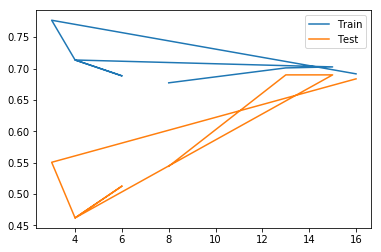

In [32]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_n_neighbors'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_n_neighbors'], result_random['mean_test_score'], label="Test")
plt.legend()